# Estimate optimal number of clusters via Silhouette (for K-Means)

Habiendo desarrollado una funcion para cuentificar la calidad de un clustering mediante Silhouette metric, he pensado en usarla para estimar el numero de clusters mas optimo.Este ejemplo esta hecho usando k-Means.

In [35]:
from sklearn.datasets import make_blobs

## functions

In [57]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## quantification of clustering quality via silhouette metric
def quantification_clustering_quality(X:np.array, y_km:np.array, verbose:bool = False)->np.array:
    """
    Quantification of clustering quality via silhouette metric.
    X -- Array of features used to estimate the clustering.
    y_km -- Labels returned by the clustering method to be evaluated.
    verbose -- Display or not extra information (default, False).
    return -- Array of statistics (mean, std) for each cluster and total.
    """
    # clusters labels
    cluster_labels = np.unique(y_km)
    # number of clusters
    n_clusters = cluster_labels.shape[0]
    # estimate silhouette values (for all records)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    # initialize
    statistics = list()
    # loop of cluster labels
    for i, c in enumerate(cluster_labels):
        # collect silhouette values per cluster
        c_silhouette_vals = silhouette_vals[y_km == c]
        # estimate statistics for each cluster
        statistics.append([f"C{c}", np.mean(c_silhouette_vals), np.std(c_silhouette_vals)])
        # display
        if verbose:
            print(f"C{c}", np.mean(c_silhouette_vals), np.std(c_silhouette_vals))
    # final statistics
    statistics.append([f"ALL", np.mean(silhouette_vals), np.std(silhouette_vals)])
    # display
    if verbose:
        print(f"ALL", np.mean(silhouette_vals), np.std(silhouette_vals))
    # to df and return
    return statistics


## estimate the optimal number of clusters for k-Means algorithm
def estimate_optimal_num_clusters_kmeans(X:np.array, max_num_clusters:int = 10, with_plot:bool = False)->int:
    """
    Estimate the optimal number of clusters for k-Means algorithm.
    X -- Array of features used to estimate the clustering.
    max_num_clusters -- Maximum number of clusters to be tested.
    with_plot -- Plot or not extra information (default, False).
    return -- The most optimal number of clusters.
    """
    # number of clusters to be tested
    num_clusters_to_test = np.arange(2, max_num_clusters + 1, 1)
    # initialize
    metrics = np.array([])
    # loop of number of clusters
    for nc in num_clusters_to_test:
        ## k-means clustering definition, fit and prediction
        km = KMeans(n_clusters=nc , init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
        y_km = km.fit_predict(X)
        ## cluster cuantification
        metric = quantification_clustering_quality(X, y_km)[-1][1]
        # append
        metrics = np.append(metrics, metric)
        # clean
        del metric, km, y_km
    # sort num of cluster according to metric values
    num_clusters_sorted_according_metric = num_clusters_to_test[np.argsort(metrics)[::-1]]
    # get the most optimal
    num_cluster_optimal = num_clusters_sorted_according_metric[0]
    # with plot if it is required
    if with_plot:
        ## plot
        plt.plot(num_clusters_to_test, metrics, color = "grey")
        plt.scatter(num_clusters_to_test, metrics, 
                    c='white', marker='o', edgecolor='black', s=25)
        plt.axvline(num_cluster_optimal, color="red", linestyle="--")
        plt.grid()
        plt.tight_layout()
        plt.title(f"Optimal Number of Clusters = {num_cluster_optimal}")
        plt.xlabel("Number of clusters")
        plt.ylabel('Silhouette coefficient')
        plt.show()        
    # return
    return num_cluster_optimal

# Data sample cleation

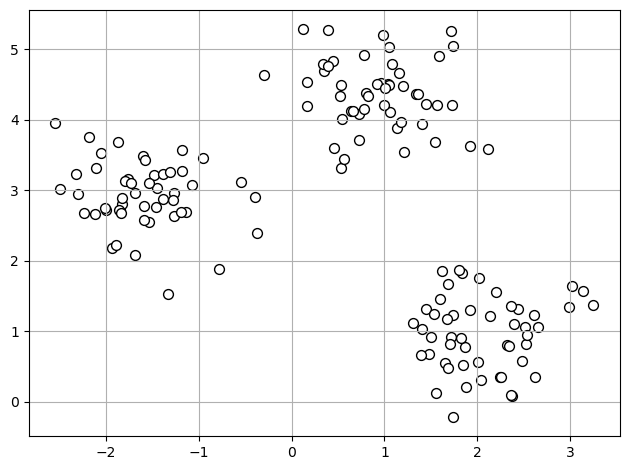

In [58]:
## data sample creation
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

## plot
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

# Estimate best number of clusters via silhouette

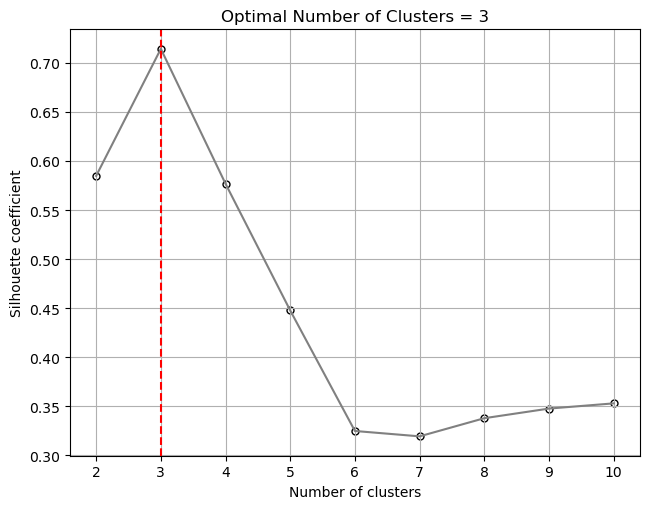

In [59]:
num_cluster_optimal = estimate_optimal_num_clusters_kmeans(X, max_num_clusters = 10, with_plot=True)

In [60]:
## k-means clustering with the most optimal number of clusters
km = KMeans(n_clusters=num_cluster_optimal , init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

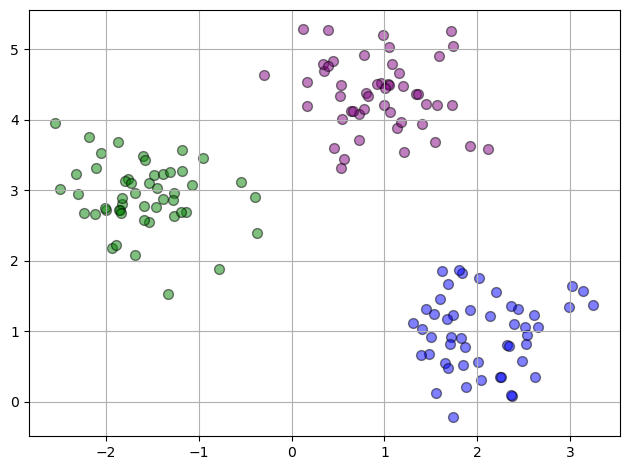

In [61]:
colors = ["blue", "green", "purple", "red", "yellow", "brown", "grey"]
for cluster in np.unique(y_km):
    i_cluster = np.where(y_km == cluster)[0]
    plt.scatter(X[i_cluster, 0], X[i_cluster, 1], 
                c=colors[cluster], marker='o', edgecolor='black', s=50, alpha=.5)    
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()